Machine Learning project. Using the k-Nearest-Neighbours algorithm.

In this guided project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set here and can download it directly from here:

https://archive.ics.uci.edu/ml/datasets/automobile
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

## Data Cleaning

In [1]:
import pandas as pd

cars=pd.read_csv("imports-85.data")

In [2]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
column_names=["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body_style","drive_wheels","engine_location","wheel_base","length","width","height","curb_weight","egine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]

In [4]:
cars=pd.read_csv("imports-85.data",names=column_names)

In [5]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Fehlende Daten scheinen mit einem Fragezeichen-Symbol gekennzeichnet zu sein

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
egine_type           205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Umwandeln in ein numerisches Format: "normalized_losses", "num_of_doors","num_of_cylinders", "horsepower", "peak_rpm", "price".

"bore", "stroke", "num_of_cylinders " und "num_of_doors" sind per se auch numerisch, eine Umwandlung dürfte aber keinen Mehrtwert bringen.

### Mögliche Features für ein Modell:
symboling           
normalized_losses            
wheel_base           
length               
width                
height               
curb_weight              
engine_size          
compression_ratio    
horsepower           
peak_rpm             
city_mpg            
highway_mpg
### Target für das ein Modell:
price

## 1. Umwandlung der Variablentypen

Ersetzen der "?"-Symbole (Fehlende Einträge).

In [7]:
(cars=="?").sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
egine_type            0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [8]:
import numpy as np

In [9]:
cars.replace("?",np.nan, inplace=True)

In [10]:
(cars=="?").sum().sum()

0

Anpassen der Datentypen für numerische Columns

In [11]:
cars[["symboling","normalized_losses","wheel_base","length","width","height","curb_weight","engine_size","compression_ratio","horsepower","peak_rpm","city_mpf","highway_mpg","price"]]=cars[["symboling","normalized_losses","wheel_base","length","width","height","curb_weight","engine_size","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]].astype("float")

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
symboling            205 non-null float64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
egine_type           205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null float64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 

## 2. Umgang mit fehlenden Werten

In [13]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
egine_type            0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
city_mpf              0
dtype: int64

die Rows mit fehlenden Werten "price" werden sofort entfernt, da dies dier Target-Variable darstellt.

In [14]:
cars=cars.dropna(subset=["price"])

In [15]:
cars["price"].isnull().sum()

0

In [16]:
cars.shape

(201, 27)

In der Spalte "normalized_losses" befinden sich 47 von 201 fehlenden Daten. Das entspricht 18,4%, ist viel. Das Entfernen der rows würde den Datensatz spürbar verkleinern. Die Spalte komplett entfernen wäre eine vorzuziehende alternative. Allerdings sollte die Möglichkeit einer Schätzung aus anderen Daten zuerst erwogen werden.

Die Dokumentation des Datensatzes sagt folgendes zu diesem Faktor:
"The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year."

Folglich wäre eine Schätzung über den Auto-Typ erlaubt. Dies wird geprüft.

In [17]:
cars.pivot_table(index="body_style",values="normalized_losses",aggfunc=lambda x:len(x.unique()))

,normalized_losses
body_style,
convertible,3.0
hardtop,4.0
hatchback,30.0
sedan,32.0
wagon,12.0


Die Zuordnung scheint komplizierter zu sein, als über den reinen Datentypen. 

In [18]:
cars.pivot_table(index="body_style",values="normalized_losses",aggfunc=[np.mean,np.std,len,lambda x:x.isnull().sum()])

,mean,std,len,<lambda>
,normalized_losses,normalized_losses,normalized_losses,normalized_losses
body_style,,,,
convertible,138.000000,5.656854,6.0,4.0
hardtop,132.600000,26.585710,8.0,3.0
hatchback,132.083333,39.644732,68.0,8.0
sedan,120.700000,31.665738,94.0,14.0
wagon,87.529412,12.344623,25.0,8.0


In [19]:
cars["normalized_losses"].mean()

122.0

In [20]:
cars["normalized_losses"].std()

35.442167530553256

"Hardtop", "Hatchback" und "Sedan" zeigen ähnliche Werte, "Hatchback" hat eine deutlich höhere Standardabweichung". "Wagon" sticht heraus, mit niedrigem Mittelwert und niedriger Standardabweichung. Es wird sich für ein Auffüllen durch den Mittelwert entschieden, die Abweichungen vom Gesamt-Mittelwert klein sind. Es wird allerdings über den Fahrzeugtyp aufgefüllt, da hierdurch eine etwas kleinere Unschärfe erreicht wird.

In [21]:
for b in cars["body_style"].unique():
    cars.loc[cars["body_style"]==b,"normalized_losses"]=cars.loc[cars["body_style"]==b,"normalized_losses"].fillna(cars.loc[cars["body_style"]==b,"normalized_losses"].mean())

In [22]:
cars["normalized_losses"].isnull().sum()

0

In [23]:
cars.shape

(201, 27)

In [24]:
cars=cars.dropna()

In [25]:
cars.shape

(193, 27)

In [26]:
cars.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
egine_type           0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
city_mpf             0
dtype: int64

In [27]:
cars.pivot_table(index="body_style",values="normalized_losses",aggfunc=[np.mean,np.std,len,lambda x:x.isnull().sum()])

,mean,std,len,<lambda>
,normalized_losses,normalized_losses,normalized_losses,normalized_losses
body_style,,,,
convertible,138.000000,2.529822,6.0,0.0
hardtop,132.600000,20.096908,8.0,0.0
hatchback,130.945767,38.387882,63.0,0.0
sedan,120.403261,29.363469,92.0,0.0
wagon,87.529412,10.296127,24.0,0.0


In [28]:
num_columns=["symboling","normalized_losses","wheel_base","length","width","height","curb_weight","engine_size","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg"]

In [29]:
cars_normalized=cars.copy()
for n in num_columns:
    cars_normalized[n]=(cars_normalized[n]-cars_normalized[n].min())/(cars_normalized[n].max()-cars_normalized[n].min())

In [30]:
cars_normalized.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_mpf
0,1.0,0.382199,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,...,mpfi,3.47,2.68,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0,21.0
1,1.0,0.382199,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,...,mpfi,3.47,2.68,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0,21.0
2,0.6,0.351222,alfa-romero,gas,std,two,hatchback,rwd,front,0.230321,...,mpfi,2.68,3.47,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0,19.0
3,0.8,0.518325,audi,gas,std,four,sedan,fwd,front,0.384840,...,mpfi,3.19,3.40,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0,24.0
4,0.8,0.518325,audi,gas,std,four,sedan,4wd,front,0.373178,...,mpfi,3.19,3.40,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0,18.0


## 3. Aufbau des Modells

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

In [32]:
def knn_train_test(training_column,target_column,df):
    kf=KFold(n_splits=10,shuffle=True)
    model=KNeighborsRegressor()
    mse=cross_val_score(model,df[[training_column]],df[target_column],cv=kf,scoring="neg_mean_squared_error")
    rmse=(abs(mse)**(1/2)).mean()
    return rmse

Univariater Test der verschiedenen numerischen columns.

In [33]:
rmses_dict={}
for c in num_columns:
    rmses_dict[c]=knn_train_test(c,"price",cars_normalized)

In [34]:
rmses_dict

{'city_mpg': 3647.3327327676243,
 'compression_ratio': 6067.198770616663,
 'curb_weight': 4307.77390398647,
 'engine_size': 3005.5827392600413,
 'height': 7547.078280359579,
 'highway_mpg': 4307.2743241678645,
 'horsepower': 3843.4681742330395,
 'length': 4903.083514160753,
 'normalized_losses': 6419.240089521648,
 'peak_rpm': 7493.110994931512,
 'symboling': 8340.167446062946,
 'wheel_base': 5470.626775451633,
 'width': 4447.82204973278}

In [35]:
sorted(rmses_dict.items(),key=lambda x: x[1])

[('engine_size', 3005.5827392600413),
 ('city_mpg', 3647.3327327676243),
 ('horsepower', 3843.4681742330395),
 ('highway_mpg', 4307.2743241678645),
 ('curb_weight', 4307.77390398647),
 ('width', 4447.82204973278),
 ('length', 4903.083514160753),
 ('wheel_base', 5470.626775451633),
 ('compression_ratio', 6067.198770616663),
 ('normalized_losses', 6419.240089521648),
 ('peak_rpm', 7493.110994931512),
 ('height', 7547.078280359579),
 ('symboling', 8340.167446062946)]

Das beste Resultat hat "engine_size" gebracht.

Modify the knn_train_test() function you wrote to accept a parameter for the k value.

For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.

In [36]:
def knn_train_test(training_column,target_column,df,k):
    kf=KFold(n_splits=10,shuffle=True)
    model=KNeighborsRegressor(n_neighbors=k)
    mse=cross_val_score(model,df[[training_column]],df[target_column],cv=kf,scoring="neg_mean_squared_error")
    rmse=(abs(mse)**(1/2)).mean()
    return rmse

In [37]:
rmses_dict={}
for c in num_columns:
    k_list=[]
    for i in range(1,11,2):
        k_list.append(knn_train_test(c,"price",cars_normalized,i))
        if i==9:
            rmses_dict[c]=k_list

In [38]:
rmses_dict

{'city_mpg': [5031.088274084219,
  4054.697483971549,
  3662.6707913381115,
  3963.172987938262,
  3923.20709724839],
 'compression_ratio': [7248.228580000859,
  6086.875384872113,
  6349.397112775749,
  6436.043408966425,
  6245.011492532642],
 'curb_weight': [5128.331410545673,
  4489.225528196877,
  4306.579268747408,
  4226.48294096321,
  3913.691777841931],
 'engine_size': [3626.085431925836,
  2996.3934472918804,
  2813.4365100649275,
  3258.6302033489073,
  3365.1938615434765],
 'height': [9521.928132304789,
  7483.816313156878,
  7987.3613051222665,
  7589.8732216712015,
  7391.062636784595],
 'highway_mpg': [5410.1459089725495,
  4472.977276154796,
  4374.621880951774,
  4254.51756612912,
  4125.044348621903],
 'horsepower': [4128.212591824384,
  3844.62369294042,
  3721.797820851237,
  3895.1467317914785,
  4091.1456130330416],
 'length': [5059.749650534349,
  5277.256719985893,
  4771.683274053741,
  5172.665081237619,
  5588.401597666789],
 'normalized_losses': [6734.633335

In [39]:
feature_avg_rmse={}
for k,v in rmses_dict.items():
    feature_avg_rmse[k]=sum(v)/len(v)
    
feature_avg_rmse=pd.Series(feature_avg_rmse)
feature_avg_rmse.sort_values()

engine_size          3211.947891
horsepower           3936.185290
city_mpg             4126.967327
width                4307.210494
curb_weight          4412.862185
highway_mpg          4527.461396
length               5173.951265
wheel_base           5457.655802
compression_ratio    6473.111196
normalized_losses    6646.530793
peak_rpm             7975.233818
height               7994.808322
symboling            8804.487796
dtype: float64

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

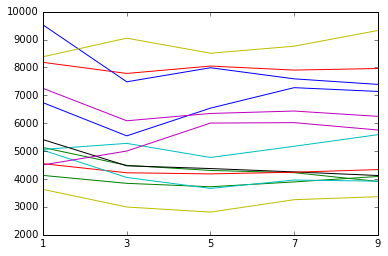

In [41]:
for k, v in rmses_dict.items():
    x=[1,3,5,7,9]
    y=v
    
    plt.plot(x,y)
    plt.xticks(x)

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

In [42]:
def knn_train_test(training_columns,target_column,df,k):
    kf=KFold(n_splits=10,shuffle=True)
    model=KNeighborsRegressor(n_neighbors=k)
    mse=cross_val_score(model,df[training_columns],df[target_column],cv=kf,scoring="neg_mean_squared_error")
    rmse=(abs(mse)**(1/2)).mean()
    return rmse

Different Models

In [43]:
rmse_2_features=knn_train_test(["engine_size","horsepower"],"price",cars_normalized,5)

In [44]:
rmse_3_features=knn_train_test(["engine_size","horsepower","city_mpg"],"price",cars_normalized,5)

In [45]:
rmse_4_features=knn_train_test(["engine_size","horsepower","city_mpg","highway_mpg"],"price",cars_normalized,5)

In [46]:
rmse_5_features=knn_train_test(["engine_size","horsepower","city_mpg","highway_mpg","curb_weight"],"price",cars_normalized,5)

In [47]:
print(rmse_2_features,
rmse_3_features,
rmse_4_features,
rmse_5_features)

2868.9663903701908 2754.229464581507 2782.6193884576724 3131.9101537809447


In [91]:
rmses_k_top3={}
features_sequence=["engine_size","horsepower","city_mpg","highway_mpg"]

for f in range(1,4):
    k_dict={}
    for k in range(1,26):
        k_dict[k]=knn_train_test(features_sequence[0:f],"price",cars_normalized,k)
        if k==25:
            rmses_k_top3["{}_features".format(f+1)]=k_dict

In [92]:
rmses_k_top3

{'2_features': {1: 3999.764825120588,
  2: 3080.5509289753927,
  3: 2842.4899407415023,
  4: 2972.7572047244066,
  5: 3183.3092233657626,
  6: 3030.278127621502,
  7: 3187.6480401261074,
  8: 3254.0143380577383,
  9: 3412.8831507682407,
  10: 3360.6109395353305,
  11: 3342.4629255421146,
  12: 3202.2383157027275,
  13: 3386.343860713383,
  14: 3622.1269938247924,
  15: 3675.1357064366784,
  16: 3635.9874388426224,
  17: 3778.4298095497916,
  18: 3882.7612636647414,
  19: 3808.2689070455585,
  20: 3950.4126705949175,
  21: 4004.842455251609,
  22: 4116.596176017125,
  23: 4096.116868039855,
  24: 4124.698308934612,
  25: 4184.652133122357},
 '3_features': {1: 2833.6911144799997,
  2: 2814.377611728451,
  3: 2853.372756976754,
  4: 2798.7790060327834,
  5: 2859.0852963721086,
  6: 2830.674395602775,
  7: 3030.5908782767597,
  8: 3034.053198708008,
  9: 3319.539554733714,
  10: 3234.6820011072514,
  11: 3415.325314678659,
  12: 3564.509207284761,
  13: 3682.171742572348,
  14: 3776.065892

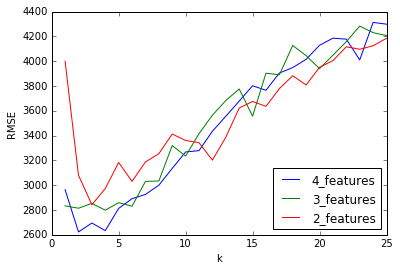

In [94]:
leg=[]
for k,v in rmses_k_top3.items():
    plt.plot(list(v.keys()),list(v.values()))
    plt.xlabel("k")
    plt.ylabel("RMSE")
    leg.append(k)
    plt.legend(leg,loc="lower right")

4 Features verursacht den niedrigsten Vorhersage-Fehler. Es empfiehlt sich dieses Modell mit einem k-Wert von 2 oder 4 zu verwenden.